<div style="direction: rtl;color: #4E4AE5;font-size: large;">
     <b>  Feature extraction
           استخراج ویژگی
</b>
<br/>
    توصيفگر ها نبايد نسبت به انتقال ، چرخش و تغيير مقياس حساس باشند!

<br/>
    توصیف بر اساس ناحیه و بافت
<br/>
   
</div>

<div style=";color: #4E4AE5;font-size: large;">
     <b>  توصیف گرهای ناحیه ای
</b>
<br/>
     •Area
    <br/>
• Form Factor:  4 pi Area / Perimeter^2
    <br/>
• Roundness :   4 Area / (pi Max-diam^2)
    <br/>
• Solidity:     Area / Convex Area
    <br/>
• Extent:       Net Area / area of bounding rectangle
    <br/>
• Compactness:  sqrt ( 4 * area / pi) / max diameter
    <br/>


<br/>
    توصیف بر اساس ناحیه و بافت
<br/>
   
</div>

روشهاي آماري توصيف بافت
- گشتاورهاي آماري مبتني برهيستوگرام
- ميانگين برای شدت روشنايي کاربرد دارد و اطلاعاتي درباره بافت نميدهد  
-  انحراف استاندارد: مقياسي از کنتراست ميانگين است
-  هموار بودن: هر چه سطح هموار تر باشد مقدار کمتر است
-  گشتاور سوم
-   یکنواختی : هر چه اين مقدار بيشتر باشد يعني اين تصوير يکنواخت تر  یا هموار تر است
-  آنتروپي: معياري براي تغيير پذيري است و براي يک تصوير ثابت صفر است

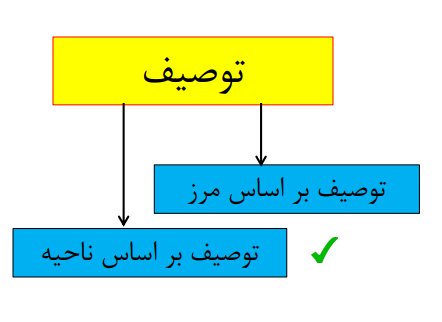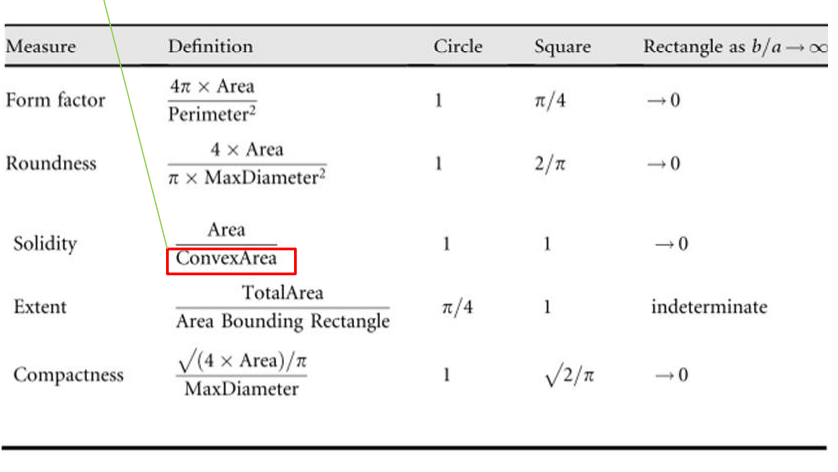

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
def R_calc(img1):
    width, height = img.shape[:2]
    var1= img1.var()/(width * height)
    out=1-(1/(1+var1))
    return out
def uniformly(imge1):
    width, height = img.shape[:2]
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    normal_hist=hist/(width* height)
    uniformity= np.sum(normal_hist**2)
    return uniformity

def entropty(img1):
    width, height = img.shape[:2]
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    hist=hist+1e-10
    normal_hist=hist/(width* height) 
    out=normal_hist*np.log(normal_hist)/np.log(2)
    out=-(np.sum(out))    
    return out


In [3]:
img=cv2.imread('images\pattern1.jpg',0)
contour = []
contour, hierarchy =cv2.findContours(img,1,2)
area = cv2.contourArea(contour[0])
x,y,w,h = cv2.boundingRect(img)
rect_area = w*h
extent = float(area)/rect_area
#------------------------------
print(extent)

0.9906427096604138


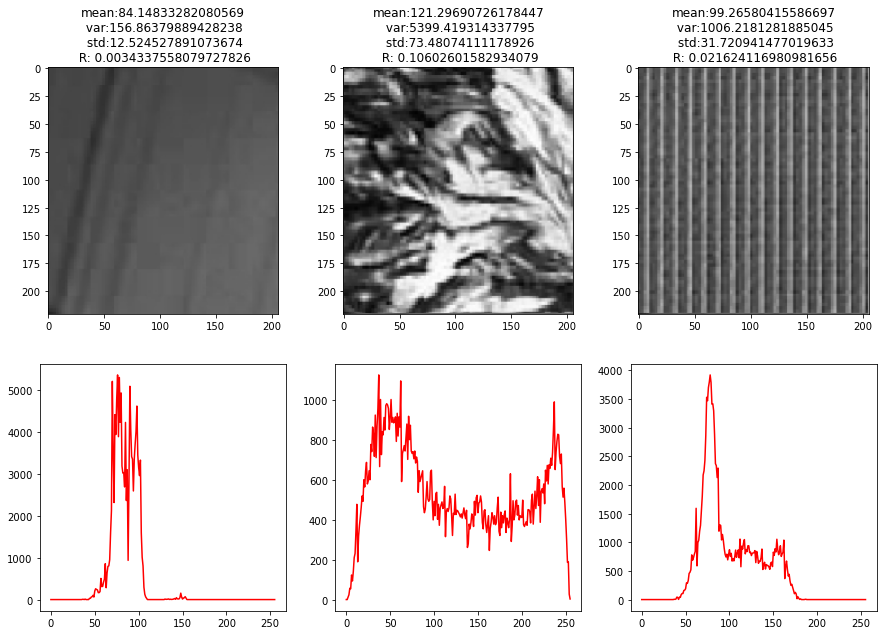

In [4]:
plt.figure(figsize=(15,10))

ax1=plt.subplot(2,3,1)
img=cv2.imread('images\pattern1.jpg')
mean=img.mean()
std=img.std()
var= img.var()
R=R_calc(img)
title="mean:" +str(mean)+"\n var:"+str(var)+"\n std:"+str(std)+"\n R: "+str(R)
ax1.set_title(title)
plt.imshow(img)

plt.subplot(2,3,4)
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.plot(hist, color = 'r')
ax2=plt.subplot(2,3,2)
img=cv2.imread('images\pattern2.jpg')
mean=img.mean()
std=img.std()
var= img.var()
R=R_calc(img)
title="mean:" +str(mean)+"\n var:"+str(var)+"\n std:"+str(std)+"\n R: "+str(R)
ax2.set_title(title)

plt.imshow(img)
plt.subplot(2,3,5)
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.plot(hist, color = 'r')

ax3=plt.subplot(2,3,3)
img=cv2.imread('images\pattern3.jpg')
mean=img.mean()
std=img.std()
var= img.var()
R=R_calc(img)
title="mean:" +str(mean)+"\n var:"+str(var)+"\n std:"+str(std)+"\n R: "+str(R)
ax3.set_title(title)
plt.imshow(img)
plt.subplot(2,3,6)
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.plot(hist, color = 'r')



یکنواختی-
آنتروپي
- هر چه مقدار "یکنواختی:  بيشتر باشد يعني اين تصوير يکنواخت تر وهموار تر  است
- آنتروپي معياري براي تغيير پذيري است و براي يک تصوير ثابت صفر است

Text(0.5, 1.0, 'uniformity: 0.1159604671635866\n entropy: 15.208318772525757')

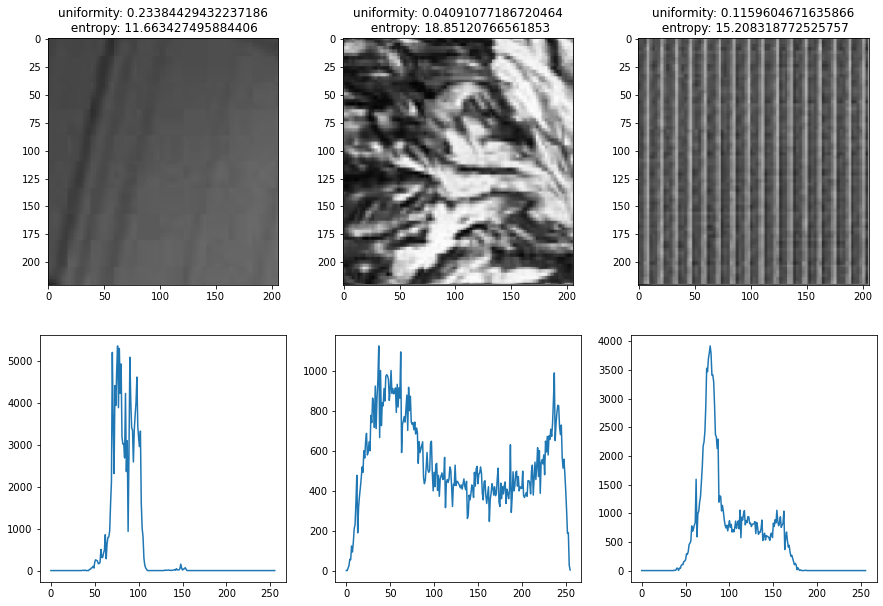

In [5]:


plt.figure(figsize=(15,10))

f1=plt.subplot(2,3,1)
img=cv2.imread('images\pattern1.jpg')
plt.imshow(img)

plt.subplot(2,3,4)
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.plot(hist)
uniformity= uniformly(img)
entropy=entropty(img)
title='uniformity: '+str(uniformity)+'\n entropy: '+str(entropy)
f1.set_title(title)

f2=plt.subplot(2,3,2)
img=cv2.imread('images\pattern2.jpg')
plt.imshow(img)
plt.subplot(2,3,5)
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.plot(hist)
uniformity= uniformly(img)
entropy=entropty(img)
title='uniformity: '+str(uniformity)+'\n entropy: '+str(entropy)
f2.set_title(title)

f3=plt.subplot(2,3,3)
img=cv2.imread('images\pattern3.jpg')
plt.imshow(img)
plt.subplot(2,3,6)
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.plot(hist)
width, height = img.shape[:2]
normal_hist=hist/(width* height)
uniformity= np.sum(normal_hist**2)

entropy=entropty(img)
title='uniformity: '+str(uniformity)+'\n entropy: '+str(entropy)
f3.set_title(title)





کميتي براي سنجش چولگي )اريب بودن( هيستوگرام است
معياري براي تعيين درجه تقارن هيستوگرام
گشتاور سوم

In [6]:
img=cv2.imread('images\pattern2.jpg',0)
m = cv2.moments(img)
m

{'m00': 5522163.0,
 'm10': 644726381.0,
 'm01': 622711048.0,
 'm20': 92361090951.0,
 'm11': 70252729551.0,
 'm02': 91844726980.0,
 'm30': 14512805372507.0,
 'm21': 9755405917527.0,
 'm12': 10138994075495.0,
 'm03': 15151765581328.0,
 'mu20': 17087668859.446884,
 'mu11': -2450347193.7026367,
 'mu02': 21624226552.675003,
 'mu30': -260640054765.8379,
 'mu21': -87596685572.85657,
 'mu12': -31477513597.829468,
 'mu03': -82122978028.36719,
 'nu20': 0.0005603564506770339,
 'nu11': -8.035431091763826e-05,
 'nu02': 0.0007091239266960646,
 'nu30': -3.6372077170472712e-06,
 'nu21': -1.22240359809469e-06,
 'nu12': -4.3926577392083944e-07,
 'nu03': -1.1460185185275331e-06}

107


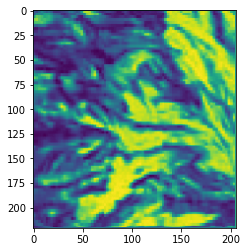

In [19]:
plt.imshow(img)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])



محاسبه محیط و مساحت:
<br/>
- خواندن تصویر
- سیاه و سفید کردن تصویر
- محاسبه کنتورهای تصویر
- انتخاب کنتور مورد نظر
- محاسبه محیط یا مساحت کنتور انتخاب شده

(412, 505)
394.0


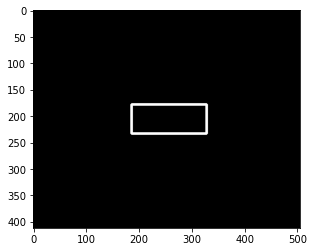

In [151]:
#محاسبه محیط و مساحت

bw_image=cv2.imread('images/1.bmp',0)
print(bw_image.shape)
black=np.zeros((412, 505))
contours, hierarchy=cv2.findContours(bw_image,1,2)
cv2.drawContours(black,contours,-1,255,3)
plt.imshow(black,cmap='gray', vmin = 0, vmax = 255)
#محاسبه مساحت
area = cv2.contourArea(contour[0])
#محاسبه محیط
perimeter = cv2.arcLength(contours[0],True)
print(perimeter)





(350, 350)
((184.13119506835938, 167.4141845703125), (341.7010498046875, 115.89393615722656), 27.063261032104492)


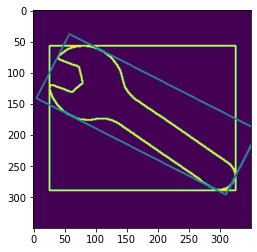

In [152]:
# دو جور مسطتیل دور یک شکل می توان رسم کرد
bw_img= cv2.imread('images/spanners.png',0)
print(bw_img.shape)
black= np.zeros(bw_img.shape)
contours, hierarc=cv2.findContours(bw_img,1,2)
cv2.drawContours(black,contours,6,255,2)

#1
x,y,w,h = cv2.boundingRect(contours[6])
cv2.rectangle(black,(x,y),(x+w,y+h),(255,255,255),2)
#2
rect = cv2.minAreaRect(contours[6])
print(rect)
box = cv2.boxPoints(rect)
box = np.int0(box)

cv2.drawContours(black,[box],0,(120,20,50),2)
plt.imshow(black)

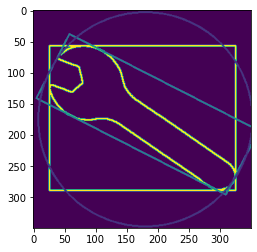

In [153]:
#رسم دایره ای دور شکل با کمترین مساحت
(x,y),radius = cv2.minEnclosingCircle(contours[6])
center = (int(x),int(y))
radius = int(radius)
cv2.circle(black,center,radius,(40,255,0),2)
plt.imshow(black)

In [154]:

x,y,w,h = cv2.boundingRect(contours[6])
aspect_ratio = float(w)/h
aspect_ratio

1.2887931034482758

In [155]:
#Extent نسبت مساحت کانتور به مساحت مستطیل محدود کننده است
area = cv2.contourArea(contours[6])
x,y,w,h = cv2.boundingRect(contours[6])
rect_area = w*h
extent = float(area)/rect_area
extent


0.2843602237342867

(418, 483)


0.780674240227734

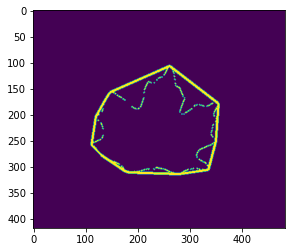

In [156]:
# نسبت سطح کانتور به سطح بدنه محدب آن است
#ترسیم convexHull
leaf=cv2.imread("images/leaf.png",0)
print(leaf.shape)
black=np.zeros(leaf.shape)
contours, hierarchy=cv2.findContours(leaf,1,2)
cv2.drawContours(black,contours[0],-1,(255,255,255),2)
hull = cv2.convexHull(contours[0])
cv2.drawContours(black,[hull],-1,(255,255,255),3)
plt.imshow(black)
#محاسبه Solidity
area = cv2.contourArea(contours[0])
hull = cv2.convexHull(contours[0])
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
solidity


